

# Підготовка даних до аналізу






<h2>Мета</h2>

Ознайомитись з методикою первинної обробки даних. Після завершення цієї лабораторної роботи ви зможете:

* Досліджувати структуру завантажених даних
* Виправляти формати даних
* Знаходити та заповнювати пропуски в даних
* Знаходити викиди та некоректні значення
* Будувати прості візуалізації




<a name="task"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>





1. Скачати дані із файлу <a href="https://drive.google.com/file/d/1Vz4Kkbu4HVMuBKsOz_5gq3C8jYYXA89d/view?usp=drive_link" target="_blank">'Data2.csv'</a>. Записати дані у dataframe. Дослідити структуру даних.
2. Виправити помилки в даних.
3. Заповнити пропуски.
4. Додати стовпчик із щільністю населення.
5. Побудувати діаграми розмаху та гістограми.


<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Дослідити структуру даних</p>
</div>


Зчитую дані з файлу у датафрейм


In [3]:
import pandas as pd

df = pd.read_csv("../Data2.csv", sep=';' ,encoding='cp1252')
df

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,"561,7787463",34656032.0,"9809,225",652860
1,Albania,Europe & Central Asia,"4124,98239",2876101.0,"5716,853",28750
2,Algeria,Middle East & North Africa,"3916,881571",40606052.0,"145400,217",2381740
3,American Samoa,East Asia & Pacific,"11834,74523",55599.0,NaN,200
4,Andorra,Europe & Central Asia,"36988,62203",77281.0,"462,042",470
...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,NaN,102951.0,NaN,350
213,West Bank and Gaza,Middle East & North Africa,"2943,404534",4551566.0,NaN,6020
214,"Yemen, Rep.",Middle East & North Africa,"990,334774",27584213.0,"22698,73",527970
215,Zambia,Sub-Saharan Africa,"1269,573537",16591390.0,"4503,076",752610


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
DATA_PATH = 'data/Data2.csv'

# Зчитуємо файл із заданим розділяючим символом ";"
df = pd.read_csv(DATA_PATH, sep=';')

'''
Зауваження: попередній код зчитування з файлу підходить для
файлів з кодуванням utf-8. Проте файл Data2.csv спочатку мав інше
кодування. Дане кодування потрібно вказати в якості параметру:
    
'''

df = pd.read_csv(DATA_PATH, sep=';', encoding='cp1252')


```
</details>




Досліджую структуру даних


In [ ]:
df.dtypes

In [ ]:
df['GDP per capita'].count()

In [ ]:
df['Populatiion'].count()

In [ ]:
df['CO2 emission'].count()

In [ ]:
df['Area'].sort_values()

In [ ]:
df['GDP per capita'].sort_values()

Бачу наступні проблеми в даних:

1. Дані стовпців із числами, що мають дробову частину, записуються з використання коми замість крапки та представлені у вигляді об'єктів
2. Присутні від'ємні дані *(площа, ВВП)* для деяких країн
4. Назва стовпця з кількістю населення містить описку. (Populati **i** on)
3. Є пропущені значення в стовпцях з даними про ВВП, населення та викиди CO2 для багатьох країн


<a name="task2"></a> <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2"> Завдання  #2: </h2>

<p>Виправити помилки в даних</p>
</div>


**Проблема 1**

Виправлю описку в назві стовпця 

In [4]:
df.columns = ['Country Name', 'Region', 'GDP per capita', 'Population', 'CO2 emission', 'Area']
df.columns

Index(['Country Name', 'Region', 'GDP per capita', 'Population',
       'CO2 emission', 'Area'],
      dtype='object')

**Проблема 2**

Використаю регулярні вирази для того, щоб замінити коми на крапки. Також приведу дані до типу float. 

In [5]:
cols_to_update = ['GDP per capita', 'CO2 emission', 'Area']

df_clean = df.copy()
df_clean[cols_to_update] = df_clean[cols_to_update].apply(lambda x: pd.to_numeric(x.str.replace(',', '.', regex=True), errors='coerce'))
df_clean

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,NaN,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042,470.0
...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,NaN,102951.0,NaN,350.0
213,West Bank and Gaza,Middle East & North Africa,2943.404534,4551566.0,NaN,6020.0
214,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,22698.730,527970.0
215,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4503.076,752610.0


**Проблема 3**

Виправлю значення від'ємних даних на додатні, за допомогою команди `abs()`

In [6]:
df_clean['Area'] = df_clean['Area'].abs()
df_clean['Area'].sort_values()

130           2.0
74           10.0
137          20.0
201          30.0
116          30.3
          ...    
26      8515770.0
41      9562911.0
206     9831510.0
35      9984670.0
160    17098250.0
Name: Area, Length: 217, dtype: float64

In [7]:
df_clean['GDP per capita'] = df_clean['GDP per capita'].abs()
df_clean['GDP per capita'].sort_values()

31     285.727442
119    300.307665
134    382.069330
37     382.213174
118    401.742270
          ...    
182           NaN
189           NaN
200           NaN
210           NaN
212           NaN
Name: GDP per capita, Length: 217, dtype: float64

<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3"> Завдання  #3: </h2>

<p>Заповнити пропуски</p>
</div>


Через важливість та унікальність даних їхнє прогнозування або відтворення на основі інших країн неможливе. Країни з відсутніми даними видалятимуться зі списку. Будь-які інші можливі способи можуть спотворити наше уявлення про країни та створити неправильну картину

In [8]:
df_clean.dropna(inplace=True)

Як ми бачимо, кільість стовпців зменшилася

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    183 non-null    object 
 1   Region          183 non-null    object 
 2   GDP per capita  183 non-null    float64
 3   Population      183 non-null    float64
 4   CO2 emission    183 non-null    float64
 5   Area            183 non-null    float64
dtypes: float64(4), object(2)
memory usage: 10.0+ KB


 <a name="task4"></a>
 <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4"> Завдання  #4: </h2>

<p>Додати стовпчик із щільністю населення</p>
</div>


Щільність населення розрахую по формулі:

p/a, де p - кількість населення, a - площа країни

In [10]:
df_clean['Population density'] = df_clean['Population'] / df_clean['Area']
df_clean

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860.0,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853,28750.0,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217,2381740.0,17.048902
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042,470.0,164.427660
5,Angola,Sub-Saharan Africa,3308.700233,28813463.0,34763.160,1246700.0,23.111786
...,...,...,...,...,...,...,...
209,Vanuatu,East Asia & Pacific,2860.566475,270402.0,154.014,12190.0,22.182281
211,Vietnam,East Asia & Pacific,2170.648054,92701100.0,166910.839,330967.0,280.091671
214,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,22698.730,527970.0,52.245796
215,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4503.076,752610.0,22.045136


<a name="task5"></a>
 <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5"> Завдання  #5: </h2>

<p>Побудувати діаграми розмаху та гістограми</p>
</div>


Для побудови графіків скористайтесь бібліотекою Matplotlib. Спробуйте погратись з кольорами, розмірами та підписами.


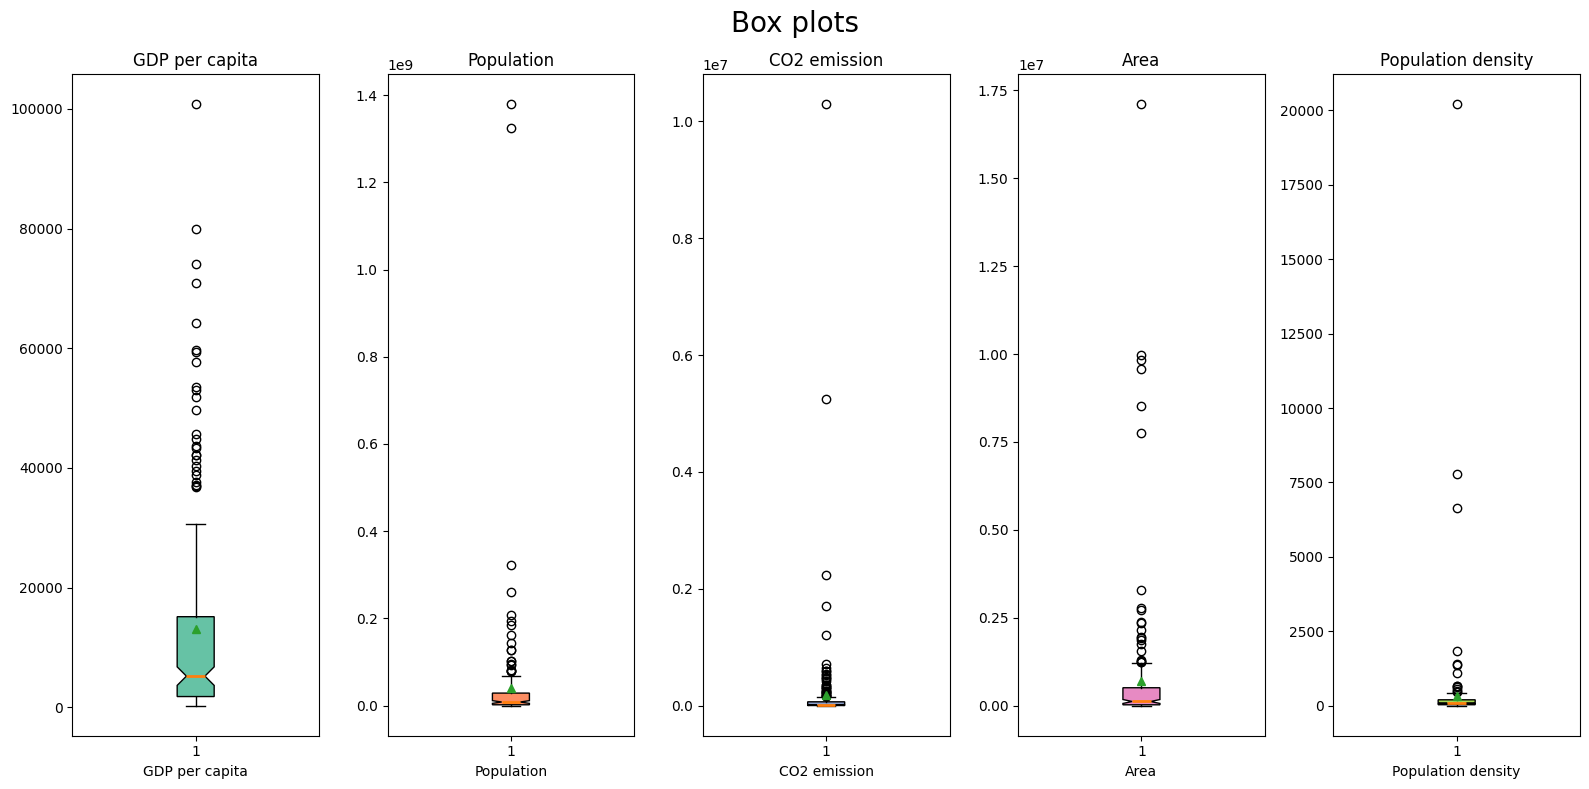

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

df_cols = ['GDP per capita', 'Population', 'CO2 emission', 'Area', 'Population density']

fig, axs = plt.subplots(1, 5, figsize=(16, 8))
fig.suptitle('Box plots', fontsize=20)

colors = sns.color_palette("Set2", 5)

for i, col in enumerate(df_cols):
  axs[i].set_title(col)
  axs[i].boxplot(df_clean[col], patch_artist=True, notch=True, vert=True, showmeans=True,
                  medianprops={"linewidth": 2}, boxprops={"facecolor": colors[i]})
  axs[i].set_xlabel(col) 

plt.tight_layout()

<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# Імпортуємо бібліотеку Matplotlib
import matplotlib.pyplot as plt
    
# діаграми розмаху для "GDP per capita", "Population", "CO2 emission" та "Area"

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

fig.suptitle('Діаграми розмаху', fontsize=16)

axs[0].set_title('GDP per capita')
axs[0].boxplot(df['GDP per capita'])

axs[1].set_title('Population')
axs[1].boxplot(df['Population'])

axs[2].set_title('CO2 emission')
axs[2].boxplot(df['CO2 emission'])

axs[3].set_title('Area')
axs[3].boxplot(df['Area'])

plt.show()

```
</details>




<a name="task6"></a>
 <div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Дайте відповіді на питання</p>
</div>


1. Яка країна має найбільший ВВП на людину (GDP per capita)?
2. Яка країна має найменшу площу?
3. Знайдіть країну з найбільшою щільністю населення у світі? У Європі та центральній Азії?
4. Покажіть топ 5 країн та 5 останніх країн по ВВП на людину.



<details><summary>Натисніть тут, щоб побачити підказку</summary>
    
Скористайтесь методами <code>loc()</code> для повернення зрізу датафрейму, <code>idxmax()</code> для повернення номера рядка з найбільшим значенням якогось показника у стовпці та <code>idxmin()</code> для повернення номера рядка з найменшим значенням якогось показника у стовпці
    
```python
df.loc[df['GDP per capita'].idxmax()]

```
    
Гарно оформити виведення інформації допоможе <code>print()</code>  
```python
print('\n' + df.loc[df['GDP per capita'].idxmax(), 'Country Name'] + ' має найбільший ВВП на людину')
```   
  
</details>


1. Країна з найбільшим ВВП на душу населення

In [12]:
df_clean.loc[df_clean['GDP per capita'].idxmax()]


Country Name                     Luxembourg
Region                Europe & Central Asia
GDP per capita                  100738.6842
Population                         582972.0
CO2 emission                       9658.878
Area                                 2590.0
Population density               225.085714
Name: 115, dtype: object

2. Країна з найменшою площею

In [13]:
df_clean.loc[df_clean['Area'].idxmin()]

Country Name                        Nauru
Region                East Asia & Pacific
GDP per capita                7821.298918
Population                        13049.0
CO2 emission                       47.671
Area                                 20.0
Population density                 652.45
Name: 137, dtype: object

3. Країни з найбільшою щільністю населення

Європа та центральна Азія

In [20]:
df_europe_and_central_asia = df_clean.loc[(df_clean['Region'] == 'Europe & Central Asia')]
df_clean.loc[df_europe_and_central_asia['Population density'].idxmax()]

Country Name                    Netherlands
Region                Europe & Central Asia
GDP per capita                  45637.88675
Population                       17018408.0
CO2 emission                     167303.208
Area                                41540.0
Population density               409.687241
Name: 139, dtype: object

Світ

In [21]:
df_clean.loc[df_clean['Population density'].idxmax()]

Country Name             Macao SAR, China
Region                East Asia & Pacific
GDP per capita                74017.18471
Population                       612167.0
CO2 emission                      1283.45
Area                                 30.3
Population density           20203.531353
Name: 116, dtype: object

4. Країни з найбільшими та найменшими показниками ВВП на душу населення

In [23]:
df_sorted_by_gdp = df_clean.sort_values(by='GDP per capita', ascending=False)
df_sorted_by_gdp

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
115,Luxembourg,Europe & Central Asia,100738.684200,582972.0,9658.878,2590.0,225.085714
188,Switzerland,Europe & Central Asia,79887.518240,8372098.0,35305.876,41290.0,202.763333
116,"Macao SAR, China",East Asia & Pacific,74017.184710,612167.0,1283.450,30.3,20203.531353
146,Norway,Europe & Central Asia,70868.122500,5232929.0,47626.996,385178.0,13.585742
92,Ireland,Europe & Central Asia,64175.438240,4773095.0,34066.430,70280.0,67.915410
...,...,...,...,...,...,...,...
118,Madagascar,Sub-Saharan Africa,401.742270,24894551.0,3076.613,587295.0,42.388495
37,Central African Republic,Sub-Saharan Africa,382.213174,4594621.0,300.694,622980.0,7.375230
134,Mozambique,Sub-Saharan Africa,382.069330,28829476.0,8426.766,799380.0,36.064795
119,Malawi,Sub-Saharan Africa,300.307665,18091575.0,1276.116,118480.0,152.697291


Збережіть дані у новий файл 'clean_data2.csv':


In [ ]:
df_clean.to_csv('../Data2-clean.csv', sep=';', index=False)

<h2>Виконав студент групи ІП-24  <br>Піддубний Борис</h2>
